# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [27]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt

❓ Load the CSV data as a into a `titanic_df` variable.

the csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [3]:
df = pd.read_csv(' https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

df.drop('Cabin', axis=1, inplace=True)    -this line of code removes Cabin from the list of different headers, I did this because it had the highest amount of missing values, which I found using df.isnull().sum().

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [22]:
pclass_df = df.groupby('Pclass').size().reset_index(name='Tickets')

In [23]:
pclass_df.head()

,Pclass,Tickets
0,1,216
1,2,184
2,3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

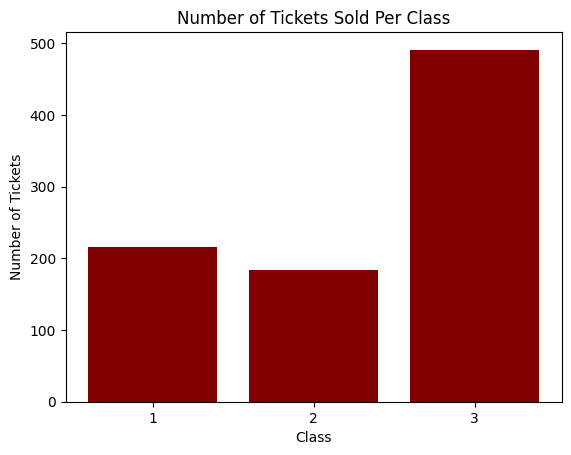

In [37]:
plt.bar(pclass_df['Pclass'], pclass_df['Tickets'],color='maroon')

plt.title('Number of Tickets Sold Per Class')
plt.xlabel('Class')
plt.ylabel('Number of Tickets')

plt.xticks(pclass_df['Pclass'])  # Ensures that all class labels are shown

plt.show()

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Let's now have a look at **survivors**.

❓ Plot a barchart showing the *survival rate* of each passenger class. `0` means no one survived in the class, `1` means everyone survived.

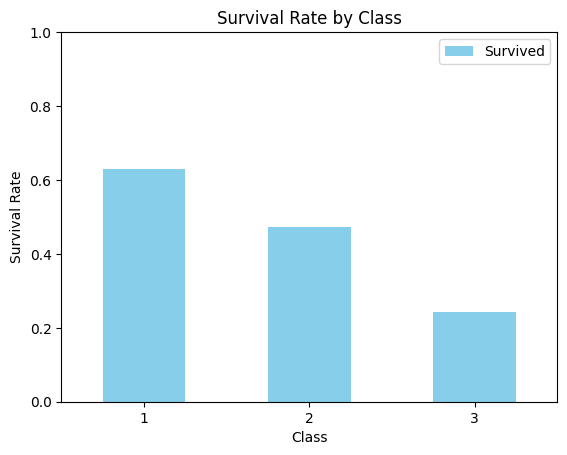

In [47]:
plot=df[['Pclass','Survived']].groupby('Pclass').mean().plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Survival Rate by Class')  # Adds a title to the plot
plt.ylabel('Survival Rate')  # Adds a label to the y-axis
plt.xlabel('Class')  # Adds a label to the x-axis (optional, for clarity)
plt.xticks(rotation=0)  # Keeps the class labels on the x-axis horizontal for readability
plt.ylim(0, 1)

# Customize further as needed
plt.show()

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [48]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart showing the *survival rate* of each gender. Based on the data, which gender had the more favourable outcome?

Text(0.5, 1.0, 'Survival Rate by Gender')

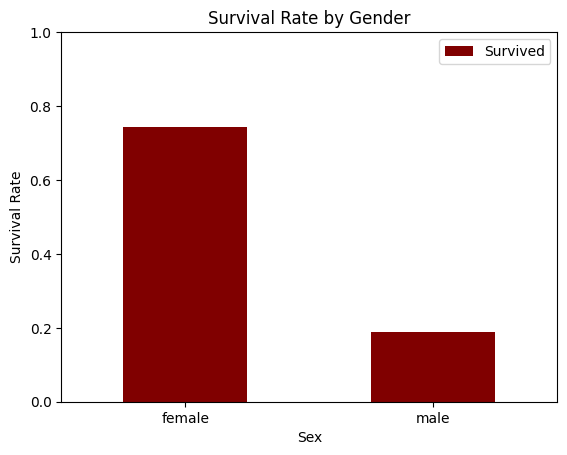

In [52]:
plot2=df[['Sex','Survived']].groupby('Sex').mean().plot(kind='bar', color=['maroon', 'chartreuse', 'sienna'])
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.title('Survival Rate by Gender')

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors for each gender.

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

<Axes: xlabel='Sex'>

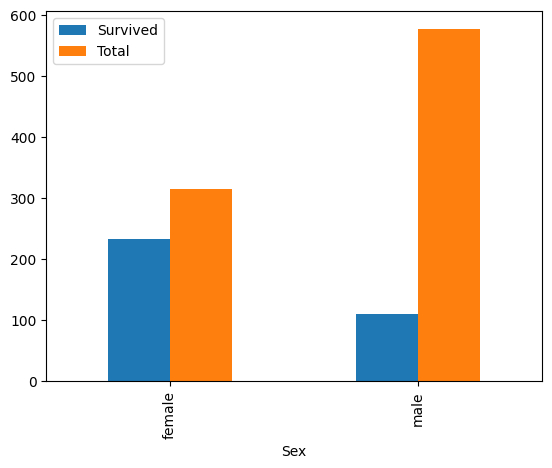

In [53]:
survivors_df = df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df['Total'] = df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df.plot(kind='bar',)

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how *survival rates* are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [54]:
children_df=df[df['Age']<18]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ How many children were there in the Titanic?

# 112 children

In [60]:
children_df.shape

(113, 11)

❓ How many children survived?

In [61]:
children_df['Survived'].sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [66]:
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [67]:
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()
children_gender_df['Total'] = children_df[['Survived', 'Sex']].groupby('Sex').count()
children_gender_df.loc['children'] = [ 0, 0 ]
children_gender_df

,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


<Axes: xlabel='Sex'>

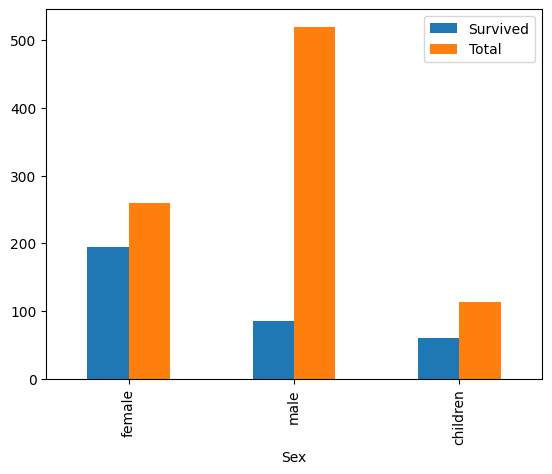

In [68]:
(survivors_df - children_gender_df).plot(kind='bar')

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [77]:
df['Survived'] = df['Survived'].astype(int)
df['SibSp'] = df['SibSp'].astype(int)
df['Parch'] = df['Parch'].astype(int)

In [80]:
df['family_size'] = df['SibSp'] + df['Parch']
df.groupby('family_size').mean()['Survived'].plot(kind='bar')

TypeError: agg function failed [how->mean,dtype->object]

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

<Axes: xlabel='Title'>

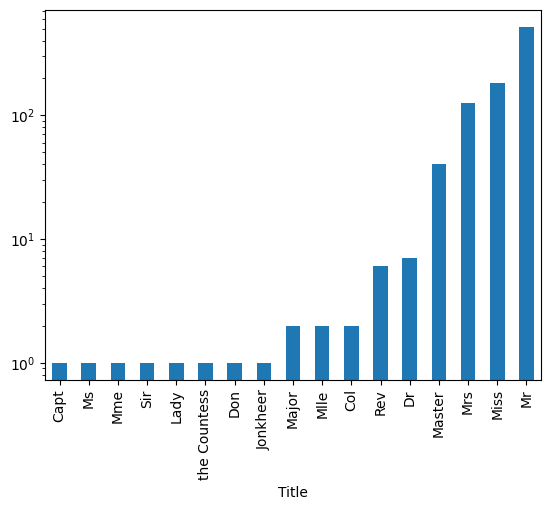

In [81]:
df['Title'] =df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.groupby('Title').count()['PassengerId'].sort_values().plot(kind='bar', logy=True)

In [82]:
df.groupby('Title').mean()['Survived'].sort_values().plot(kind='bar')

TypeError: agg function failed [how->mean,dtype->object]